In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data.head()
# test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data['Age'].replace(np.nan, -1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

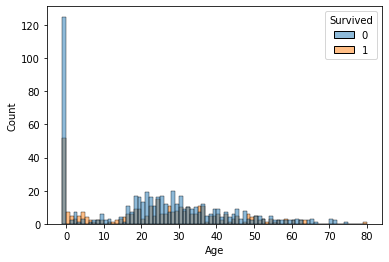

In [5]:
sns.histplot(data=train_data, x="Age", binwidth=1, hue="Survived")

In [6]:
train_data[train_data['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [7]:
train_data['Age'].replace(-1, np.nan, inplace=True)

train_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data = train_data.fillna(method='ffill')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_data['Family']=train_data['SibSp']+train_data['Parch']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,0


<AxesSubplot:xlabel='Age', ylabel='Count'>

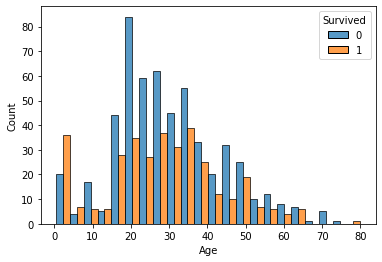

In [10]:
sns.histplot(x="Age",data=train_data,hue="Survived",multiple="dodge")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

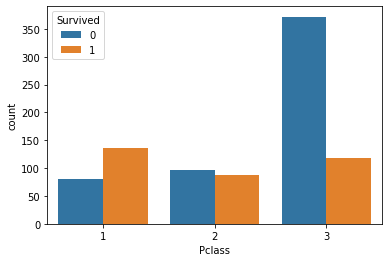

In [11]:
sns.countplot(x="Pclass",data=train_data,hue="Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

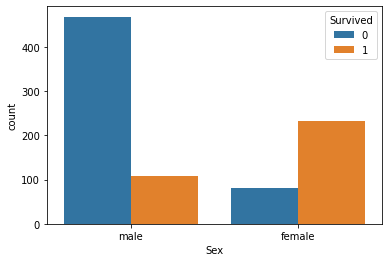

In [12]:
sns.countplot(x="Sex",data=train_data,hue="Survived")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

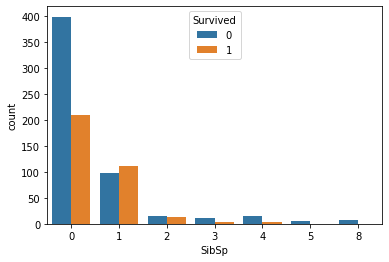

In [13]:
sns.countplot(x="SibSp",data=train_data,hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='count'>

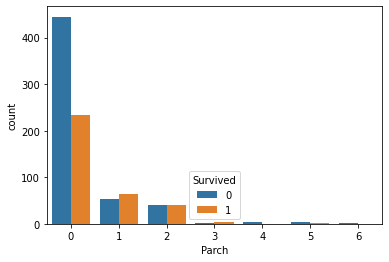

In [14]:
sns.countplot(x="Parch",data=train_data,hue="Survived")

<AxesSubplot:xlabel='Family', ylabel='count'>

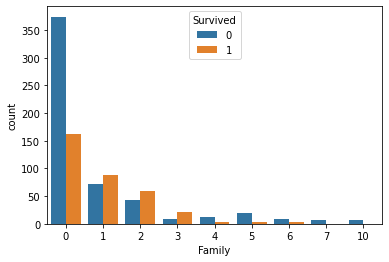

In [15]:
sns.countplot(x="Family",data=train_data,hue="Survived")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

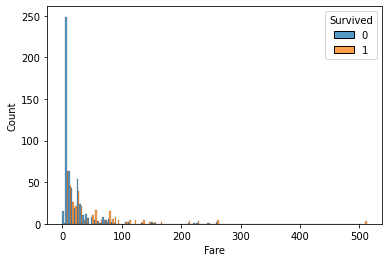

In [16]:
sns.histplot(x="Fare",data=train_data,hue="Survived",multiple="dodge")

In [17]:
train_data['Sex'].replace("female",0,inplace=True)
train_data['Sex'].replace("male",1,inplace=True)


In [18]:
# Logistic Model
Y = train_data['Survived']
X = train_data.drop(['Survived','Name','Ticket','Cabin','Embarked','Family'],axis = 1)
X.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500
5,6,3,1,35.0,0,0,8.4583
6,7,1,1,54.0,0,0,51.8625
7,8,3,1,2.0,3,1,21.0750
8,9,3,0,27.0,0,2,11.1333
9,10,2,0,14.0,1,0,30.0708


In [19]:
Y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 10)

In [21]:
Logit = LogisticRegression(solver='liblinear')
Logit.fit(X_train, y_train)
Predict = Logit.predict(X_test)
Predict_proba = Logit.predict_proba(X_test)
print(Predict[0:20])
print(Predict_proba[:20])
Score = accuracy_score(y_test, Predict)
Score

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
[[0.86998483 0.13001517]
 [0.84075807 0.15924193]
 [0.84626192 0.15373808]
 [0.10362572 0.89637428]
 [0.13629271 0.86370729]
 [0.82614179 0.17385821]
 [0.85478815 0.14521185]
 [0.80097025 0.19902975]
 [0.86278819 0.13721181]
 [0.84243646 0.15756354]
 [0.71840194 0.28159806]
 [0.2081855  0.7918145 ]
 [0.36603602 0.63396398]
 [0.52264769 0.47735231]
 [0.74984138 0.25015862]
 [0.78595706 0.21404294]
 [0.95503817 0.04496183]
 [0.96176681 0.03823319]
 [0.4210092  0.5789908 ]
 [0.83795428 0.16204572]]


0.820627802690583

In [22]:
print("lr.coef_: {}".format(Logit.coef_))
print("lr.intercept_: {}".format(Logit.intercept_))
# coef and intercept

lr.coef_: [[ 1.56341981e-04 -7.16947717e-01 -2.46279551e+00 -2.06054337e-02
  -4.75127142e-01 -1.07060122e-01  5.00292204e-03]]
lr.intercept_: [3.30596023]


In [23]:
#初始化逻辑回归算法
LogRegAlg=LogisticRegression(random_state=1,solver='liblinear')
re = LogRegAlg.fit(X,Y)
#使用sklearn库里面的交叉验证函数获取预测准确率分数
scores = model_selection.cross_val_score(LogRegAlg,X,Y,cv=5)
#使用交叉验证分数的平均值作为最终的准确率
print("准确率为: ",scores.mean())

准确率为:  0.7822672776348


In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
test_data['Sex'].replace("female",0,inplace=True)
test_data['Sex'].replace("male",1,inplace=True)

In [26]:
test_data = test_data.fillna(method='bfill')
test_data = test_data.fillna(method='ffill')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B45,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B45,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B45,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B45,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B45,S


In [27]:
test_data['Family']=test_data['SibSp']+train_data['Parch']
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B45,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B45,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B45,Q,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B45,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B45,S,1.0


In [28]:
X1 = test_data.drop(['Name','Ticket','Cabin','Embarked','Family'],axis = 1)
X1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [29]:
Predict_proba = Logit.predict_proba(X1)


In [30]:
test_data['prediction'] = Predict_proba[:,1]
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,prediction
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B45,Q,0.0,0.137058
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B45,S,1.0,0.471573
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B45,Q,0.0,0.157091
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B45,S,0.0,0.156995
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B45,S,1.0,0.579608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,39.0,0,0,A.5. 3236,8.0500,C105,S,0.0,0.133890
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,0.0,0.926519
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C105,S,0.0,0.134659
416,1308,3,"Ware, Mr. Frederick",1,38.5,0,0,359309,8.0500,C105,S,1.0,0.135144


In [31]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_data.prediction})
output.to_csv('submission.csv', index=False)